In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

## Read Data

In [44]:
df = pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

## Handel Missing Values

In [46]:
df.drop('_c39' , axis = 1 , inplace = True)

In [47]:
df.replace('?', np.nan , inplace = True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [48]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [49]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [50]:
#fill missing values with most commen values
#fillna('Rear Collision') is the same 
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [51]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [52]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [53]:
#fill missing values with most commen values
#fillna('no') is the same 
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [54]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [55]:
#fill missing values with most commen values
#fillna('no') is the same 
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [56]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [57]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [58]:
# drop unnecessary columns
drop_list = ['policy_number' ,'policy_bind_date','policy_state' , 'insured_zip','incident_location',
             'incident_date', 'incident_state' ,'incident_city' ,'insured_hobbies' ,'auto_make',  'auto_model', 'auto_year',]
df.drop(drop_list , axis = 1 , inplace = True)

In [59]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


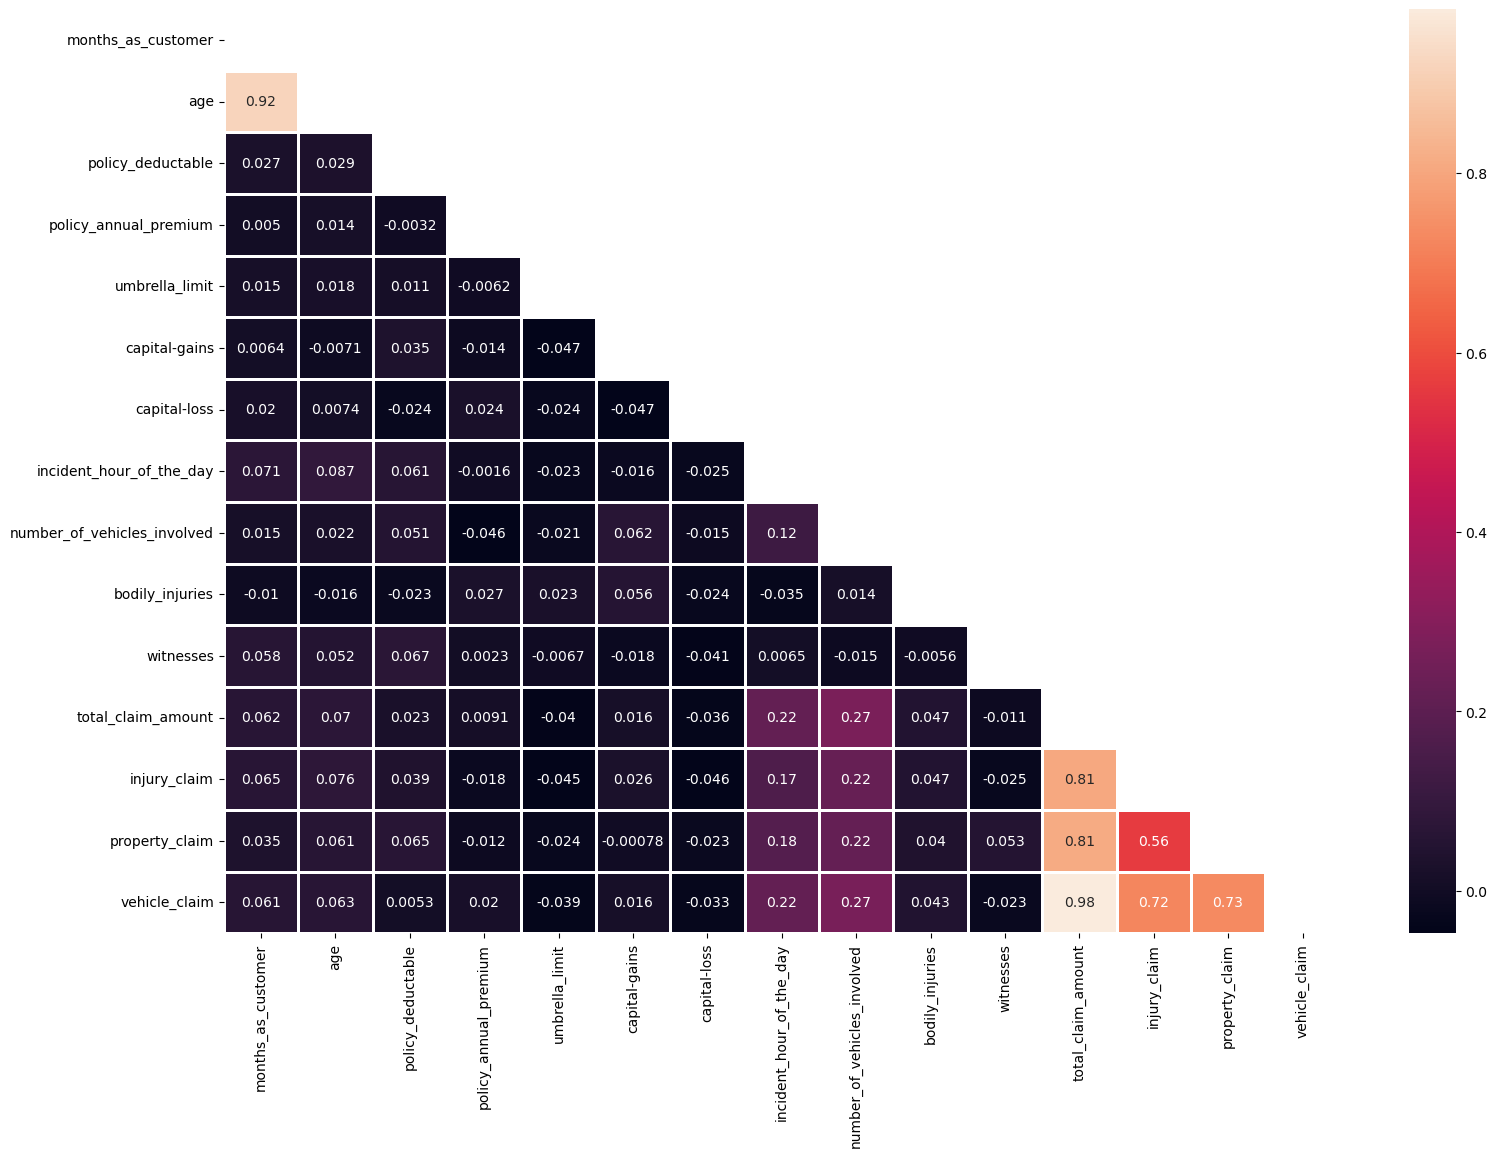

In [60]:
# heat map
# check for correlation 
#lw haga bt'sr 3la almodel btre'a wehshaa
# corr function fe pandas btl3 relation 3n aldata lw haga htdorny 
plt.figure(figsize =(18,12))
corr = df.corr()
mask = np.triu(np.ones_like(corr , dtype = bool))
sns.heatmap(data = corr , mask = mask , annot = True , fmt = '.2g' , linewidth = 1)
plt.show()

In [61]:
df.drop(columns = ['age' , 'total_claim_amount'] ,axis = 1 , inplace = True)
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


## Predict Data

In [62]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [63]:
x = df.drop('fraud_reported' , axis = 1)
y = df['fraud_reported']

In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

## Encode Cateorical Data

In [65]:
categorical_df = x.select_dtypes(include = ['object'])
categorical_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [66]:
# values unique
for col in categorical_df.columns:
    print(f"{col}: \n{categorical_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [67]:
label_encoder = LabelEncoder()

In [68]:
categorical_df = categorical_df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'O' else col)

In [69]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   policy_csl               1000 non-null   int32
 1   insured_sex              1000 non-null   int32
 2   insured_education_level  1000 non-null   int32
 3   insured_occupation       1000 non-null   int32
 4   insured_relationship     1000 non-null   int32
 5   incident_type            1000 non-null   int32
 6   collision_type           1000 non-null   int32
 7   incident_severity        1000 non-null   int32
 8   authorities_contacted    1000 non-null   int32
 9   property_damage          1000 non-null   int32
 10  police_report_available  1000 non-null   int32
dtypes: int32(11)
memory usage: 43.1 KB


In [72]:
# select numerical data
num_df = x.select_dtypes(include = ['int64' , 'float64'])

In [73]:
num_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [77]:
# combine categorical data + numerical data
x = pd.concat([num_df , categorical_df] , axis = 1)

In [78]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_deductable            1000 non-null   int64  
 2   policy_annual_premium        1000 non-null   float64
 3   umbrella_limit               1000 non-null   int64  
 4   capital-gains                1000 non-null   int64  
 5   capital-loss                 1000 non-null   int64  
 6   incident_hour_of_the_day     1000 non-null   int64  
 7   number_of_vehicles_involved  1000 non-null   int64  
 8   bodily_injuries              1000 non-null   int64  
 9   witnesses                    1000 non-null   int64  
 10  injury_claim                 1000 non-null   int64  
 11  property_claim               1000 non-null   int64  
 12  vehicle_claim                1000 non-null   int64  
 13  policy_csl         

In [79]:
x.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,1,4,2,0,2,2,0,4,1,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,1,4,6,2,3,1,1,4,0,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,6,11,3,0,1,1,4,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,6,1,4,2,0,0,4,0,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,1,0,11,4,3,1,1,2,0,0


In [81]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size =0.25 , random_state = 42)

In [83]:
x_train.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available'],
      dtype='object')

In [84]:
num_df = x_train[['months_as_customer', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains',
                'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
                 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 'vehicle_claim']]

In [88]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [89]:
scaled_data

array([[-1.12179915, -0.22193798, -0.0912418 , ..., -1.38814577,
        -1.23404603, -1.75247927],
       [ 0.43681959, -0.22193798,  0.09575789, ..., -1.54146503,
        -0.46271024,  0.18130893],
       [-0.32942873, -1.03788643,  0.85236952, ...,  0.04078974,
        -0.74263049, -0.5957021 ],
       ...,
       [ 0.20172067, -0.22193798, -0.93686656, ...,  0.64588975,
         0.67355861, -0.04697447],
       [-0.91282233, -1.03788643, -0.7273532 , ..., -0.04098053,
        -0.02313178,  1.07961208],
       [ 0.62838167, -1.03788643,  0.96293489, ..., -1.54146503,
        -0.79861454, -0.69580782]])

In [90]:
scaled_num_df =pd.DataFrame(data = scaled_data , columns = num_df.columns , index = x_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
82,-1.121799,-0.221938,-0.091242,2.107854,-0.920144,0.959487,-1.234470,-0.807865,1.223135,0.480740,-1.388146,-1.234046,-1.752479
991,0.436820,-0.221938,0.095758,-0.487315,1.185551,-0.195657,1.332588,-0.807865,-1.216629,-0.409519,-1.541465,-0.462710,0.181309
789,-0.329429,-1.037886,0.852370,-0.487315,-0.920144,-1.106858,-1.662313,-0.807865,-1.216629,-1.299778,0.040790,-0.742630,-0.595702
894,-1.409142,-1.037886,0.811308,-0.487315,-0.920144,0.959487,-0.806627,-0.807865,0.003253,1.370998,-1.337039,-1.337720,-1.818687
398,-1.748730,-1.037886,-0.726151,-0.487315,-0.920144,-0.740943,-0.664012,-0.807865,-1.216629,-0.409519,-1.422898,-1.484938,-1.907670


In [91]:
x_train.drop(columns = scaled_num_df.columns , inplace = True)

In [92]:
x_train = pd.concat([scaled_num_df , x_train] , axis = 1)
x_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
82,-1.121799,-0.221938,-0.091242,2.107854,-0.920144,0.959487,-1.234470,-0.807865,1.223135,0.480740,...,1,5,7,2,3,1,1,4,1,0
991,0.436820,-0.221938,0.095758,-0.487315,1.185551,-0.195657,1.332588,-0.807865,-1.216629,-0.409519,...,1,4,7,2,2,1,2,3,0,0
789,-0.329429,-1.037886,0.852370,-0.487315,-0.920144,-1.106858,-1.662313,-0.807865,-1.216629,-1.299778,...,0,3,11,1,2,1,1,1,0,1
894,-1.409142,-1.037886,0.811308,-0.487315,-0.920144,0.959487,-0.806627,-0.807865,0.003253,1.370998,...,1,4,8,1,1,1,1,2,0,0
398,-1.748730,-1.037886,-0.726151,-0.487315,-0.920144,-0.740943,-0.664012,-0.807865,-1.216629,-0.409519,...,0,2,9,4,3,1,3,4,0,1


## 1- Decision Tree Classifier

In [94]:
Dt_model = DecisionTreeClassifier()
params = {
    'max_depth' : [3,5,7,10],
    'min_samples_leaf' : list(range(2,10)),
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' :list(range(2,10))
}
grid_search = GridSearchCV(Dt_model , params , cv= 5)
grid_search.fit(x_train , y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.8160000000000001


In [96]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 3,
                                min_samples_split = 4)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
train_dt_pred = dt_model.predict(x_train)
print("Testing Classification Report DecisionTreeClassifier: ")
print(classification_report(y_test, dt_pred))
print("Trianing Classification Report DecisionTreeClassifier: ")
print(classification_report(y_train, train_dt_pred))

Testing Classification Report DecisionTreeClassifier: 
              precision    recall  f1-score   support

           N       0.86      0.67      0.75       183
           Y       0.44      0.70      0.54        67

    accuracy                           0.68       250
   macro avg       0.65      0.69      0.65       250
weighted avg       0.75      0.68      0.70       250

Trianing Classification Report DecisionTreeClassifier: 
              precision    recall  f1-score   support

           N       0.86      0.94      0.90       570
           Y       0.72      0.50      0.59       180

    accuracy                           0.83       750
   macro avg       0.79      0.72      0.74       750
weighted avg       0.82      0.83      0.82       750



## 2- Random Forest Classifier

In [99]:
RF_Model = RandomForestClassifier()
params = {
    'max_depth' : [3,5,7,10],
    'min_samples_leaf' : list(range(2,10)),
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [50, 100, 150, 200],
    'max_features' : ['sqrt', 'log2']
}
grid_search = GridSearchCV(RF_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 50}
0.7973333333333334


In [100]:
RF_Model = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 'log2', min_samples_leaf = 3, n_estimators = 50)
RF_Model.fit(x_train, y_train)
rf_pred = RF_Model.predict(x_test)
train_rf_pred = RF_Model.predict(x_train)
print("Testing Classification Report RandomForestClassifier: ")
print(classification_report(y_test, rf_pred))
print("Trianing Classification Report RandomForestClassifier: ")
print(classification_report(y_train, train_rf_pred))

Testing Classification Report RandomForestClassifier: 
              precision    recall  f1-score   support

           N       0.83      0.89      0.86       183
           Y       0.62      0.49      0.55        67

    accuracy                           0.78       250
   macro avg       0.73      0.69      0.70       250
weighted avg       0.77      0.78      0.78       250

Trianing Classification Report RandomForestClassifier: 
              precision    recall  f1-score   support

           N       0.93      1.00      0.96       570
           Y       0.99      0.74      0.85       180

    accuracy                           0.94       750
   macro avg       0.96      0.87      0.90       750
weighted avg       0.94      0.94      0.93       750



## 3- Gradient Boosting Classifier

In [107]:
GB_Model = GradientBoostingClassifier()
params = {
    'max_depth' : [3,5,7,10],
    'min_samples_leaf' : list(range(2,10)),
    'criterion' : ['friedman_mse', 'squared_error'],
    'n_estimators' : [50, 100, 150, 200]
}
grid_search = GridSearchCV(GB_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 50}
0.8053333333333332


In [108]:
GB_Model = GradientBoostingClassifier(criterion = 'friedman_mse', max_depth = 3, min_samples_leaf = 3 , n_estimators = 50)
GB_Model.fit(x_train, y_train)
gb_pred = GB_Model.predict(x_test)
train_gb_pred = GB_Model.predict(x_train)
print("Testing Classification Report GradiantBoostingClassifier: ")
print(classification_report(y_test, gb_pred))
print("Trianing Classification Report GradiantBoostingClassifier: ")
print(classification_report(y_train, train_gb_pred))

Testing Classification Report GradiantBoostingClassifier: 
              precision    recall  f1-score   support

           N       0.86      0.68      0.76       183
           Y       0.44      0.70      0.54        67

    accuracy                           0.68       250
   macro avg       0.65      0.69      0.65       250
weighted avg       0.75      0.68      0.70       250

Trianing Classification Report GradiantBoostingClassifier: 
              precision    recall  f1-score   support

           N       0.91      0.97      0.94       570
           Y       0.87      0.68      0.77       180

    accuracy                           0.90       750
   macro avg       0.89      0.83      0.85       750
weighted avg       0.90      0.90      0.90       750



## 4- XGboost Classifier

In [115]:
y_map = {'Y' : 1 , 'N':0}
y_train = y_train.map(y_map)

In [116]:
y_test = y_test.map(y_map)

In [118]:
import warnings
warnings.filterwarnings("ignore")

In [125]:
xgb_Model = XGBClassifier()
params = {
    'max_depth' : list(range(2,10)),
    'n_estimators' : [10, 50, 100, 130]
}
grid_search = GridSearchCV(xgb_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 2, 'n_estimators': 10}
0.8133333333333332


In [126]:
xgb_Model = XGBClassifier(max_depth = 2, n_estimators = 10)
xgb_Model.fit(x_train, y_train)
xgb_pred = xgb_Model.predict(x_test)
train_xgb_pred = xgb_Model.predict(x_train)
print("Testing Classification Report XGBClassifier: ")
print(classification_report(y_test, xgb_pred))
print("Trianing Classification Report XGBClassifier: ")
print(classification_report(y_train, train_xgb_pred))

Testing Classification Report XGBClassifier: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       183
           1       0.60      0.66      0.63        67

    accuracy                           0.79       250
   macro avg       0.74      0.75      0.74       250
weighted avg       0.80      0.79      0.79       250

Trianing Classification Report XGBClassifier: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       570
           1       0.65      0.65      0.65       180

    accuracy                           0.83       750
   macro avg       0.77      0.77      0.77       750
weighted avg       0.83      0.83      0.83       750



## 5- Vooting Classsifier

In [128]:
classifiers = [('Decision Tree', dt_model), ('Random Forest', RF_Model),
              ('Gradient Boosting', GB_Model), ('XGBOOST', xgb_Model)]
voting_model = VotingClassifier(estimators = classifiers)
voting_model.fit(x_train , y_train)
voting_pred = voting_model.predict(x_test)
train_voting_pred = voting_model.predict(x_train)

print("Testing Classification Report VotingClassifier: ")
print(classification_report(y_test, voting_pred))
print("Trianing Classification Report VotingClassifier: ")
print(classification_report(y_train, train_voting_pred))

Testing Classification Report VotingClassifier: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       183
           1       0.60      0.66      0.63        67

    accuracy                           0.79       250
   macro avg       0.74      0.75      0.74       250
weighted avg       0.80      0.79      0.79       250

Trianing Classification Report VotingClassifier: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       570
           1       0.88      0.63      0.74       180

    accuracy                           0.89       750
   macro avg       0.89      0.80      0.83       750
weighted avg       0.89      0.89      0.88       750

